In [1]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [12]:
data = pd.read_csv("D:\\dys\\Dysarthria and Non Dysarthria\\dys_data.csv")

In [13]:
data.head()

,Gender,Is_dysarthria,Wav_path,Txt_path,Prompts
0,Female,No,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,[say 'Ah-P-Eee' repeatedly]
1,Female,No,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,[say 'Ah-P-Eee' repeatedly]
2,Female,No,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,[relax your mouth in its normal position]
3,Female,No,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,[say 'Eee-P-Ah' repeatedly]
4,Female,No,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,D:\dys\Dysarthria and Non Dysarthria/Dataset/F...,dug


## Training model (Audio to Word)

In [14]:
#pip install torch torchvision


In [15]:
#pip install torchvggish


In [16]:
import torch
from torchvggish import vggish, vggish_input

In [17]:
model = vggish()

In [18]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [19]:
def extract_embedding_from_audio(audio_path):
    try:
        example = vggish_input.wavfile_to_examples(audio_path)
        if example.nelement() == 0:
            return None
        embeddings = model.forward(example)
        return embeddings.detach().numpy()
    except Exception as e:
        print(f"Error processing file: {audio_path}")
        return None

In [20]:
# Check column names
print(data.columns)

# Inspect first few rows of the DataFrame




Index(['Gender', 'Is_dysarthria', 'Wav_path', 'Txt_path', 'Prompts'], dtype='object')


In [21]:
audio_voice = data['Wav_path']
labels = data['Prompts']


In [22]:
#audio_voice = data['File Name']
#labels = data['Label']

In [23]:
embeddings = [extract_embedding_from_audio(file) for file in audio_voice]

Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0002.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0003.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0004.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0005.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0006.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0007.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0008.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC02/Session3/Wav/0009.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Data

Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0025.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0026.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0027.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0028.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0029.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0030.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0031.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_Non_Dysarthria/FC03/Session1/Wav/0032.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Data

Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F01/Session1/Wav/0068.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0001.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0002.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0003.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0004.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0005.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0006.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0007.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Female_dysarthria/F04/Session2/Wav/0

Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session2/Wav/0004.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session2/Wav/0005.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC02/Session2/Wav/0006.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0188.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0189.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0232.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0288.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dysarthria/MC04/Session1/Wav/0289.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Non_Dys

Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0075.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0079.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0140.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0175.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0224.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0225.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0230.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0241.wav
Error processing file: D:\dys\Dysarthria and Non Dysarthria/Dataset/Male_Dysarthria/M02/Session2/Wav/0242.wav
Error proc

In [24]:
# Filter out NoneType elements
non_empty_embeddings = [emb for emb in embeddings if emb is not None and len(emb) > 0]
non_empty_labels = [label for emb, label in zip(embeddings, labels) if emb is not None and len(emb) > 0]


In [25]:
non_empty_embeddings = [emb for emb in embeddings if emb is not None]
non_empty_labels = [label for emb, label in zip(embeddings, labels) if emb is not None]

In [26]:

len(non_empty_embeddings)

5547

In [27]:
for i in non_empty_embeddings:
    print(len(i))

11
7
6
5
2
2
2
3
2
2
2
3
3
3
6
3
3
3
3
3
3
3
14
3
7
6
7
3
3
3
3
3
6
3
3
4
3
3
3
5
3
3
3
4
3
6
5
3
3
3
3
3
3
5
3
3
3
3
6
2
7
2
3
3
3
3
3
3
2
3
3
6
3
3
5
5
4
2
2
12
2
3
3
4
4
3
3
3
3
7
3
3
2
3
3
3
3
3
3
3
3
6
6
6
3
2
3
3
3
3
4
3
5
5
2
3
3
3
3
3
3
3
6
3
3
2
3
3
3
4
3
3
4
3
3
2
3
3
4
4
2
2
3
3
3
3
3
3
3
4
2
2
3
3
3
2
4
2
3
3
5
2
2
2
5
10
9
8
9
7
128
2
10
128
2
128
128
128
6
2
2
2
2
128
5
128
5
2
128
2
2
5
3
128
4
4
7
12
6
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
2
128
128
128
128
128
128
128
128
7
4
128
128
128
128
128
2
128
128
128
128
128
2
2
128
4
128
128
6
128
128
128
2
128
128
4
5
5
128
2
128
128
128
128
128
5
2
10
128
128
128
3
128
128
128
2
2
6
4
2
5
128
9
128
2
12
6
8
11
128
128
128
128
128
5
3
128
2
2
2
128
128
5
2
128
2
10
10
10
128
128
9
7
8
8
2
2
2
2
3
5
128
2
2
2
128
2
128
2
2
2
2
128
128
2
2
4
128
4
2
128
128
128
128
2
128
128
128
128
128
128
11
128
7
128
128
6
128
128
128
128
128
128
18
128
128
128
128
6
3
3
4
4
128
3
12

In [28]:
len(labels)

8213

In [29]:
df = pd.DataFrame({'Label': non_empty_labels, 'Embeddings': non_empty_embeddings})

In [30]:
df.head()

,Label,Embeddings
0,[say 'Ah-P-Eee' repeatedly],"[[159.0, 2.0, 164.0, 96.0, 183.0, 82.0, 76.0, ..."
1,[say 'Ah-P-Eee' repeatedly],"[[159.0, 0.0, 161.0, 100.0, 174.0, 74.0, 68.0,..."
2,[relax your mouth in its normal position],"[[159.0, 0.0, 160.0, 105.0, 172.0, 68.0, 67.0,..."
3,[say 'Eee-P-Ah' repeatedly],"[[153.0, 9.0, 144.0, 91.0, 207.0, 69.0, 69.0, ..."
4,dug,"[[159.0, 3.0, 160.0, 105.0, 186.0, 76.0, 83.0,..."


In [31]:
#len(df['Embeddings'][900])

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [33]:
X = df['Embeddings'].values.tolist()
y = df['Label']

In [34]:
y = labelencoder.fit_transform(y)

In [35]:
X_flat = [emb.flatten() for emb in X]

### Padding Sequences

In [36]:
max_length = 100  # You can adjust this value based on your data
X_padded = tf.keras.utils.pad_sequences(X_flat, maxlen=max_length, padding='post', dtype='float32')


In [37]:
#from sklearn.model_selection import train_test_split

# Ensure that X_padded and y have enough samples
print("Number of samples in X_padded:", len(X_padded))
print("Number of samples in y:", len(y))

# Adjust the train_test_split call
#X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, train_size=0.8, random_state=42)


Number of samples in X_padded: 5547
Number of samples in y: 5547


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [41]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4437, 1110, 4437, 1110)

### SVC

In [44]:
from sklearn.svm import SVC


In [45]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
len(y_pred)

1110

In [48]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [49]:
print("Accuracy", accuracy)
print("\n Classification report: \n", report)

Accuracy 0.0045045045045045045

 Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          23       0.00

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=100)

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [53]:
rand_y_pred = rf.predict(X_test)

In [54]:
accuracy_rf = accuracy_score(y_test, rand_y_pred)
report_rf = classification_report(y_test, rand_y_pred)

C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mianj\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [55]:
print(accuracy_rf)

print(report_rf)

0.0036036036036036037
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
     

# LSTM

In [221]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [222]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Assuming 1D embeddings
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax activation for classification
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [223]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM input
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
66/66 [==============================] - 16s 43ms/step - loss: 3.4286 - accuracy: 0.0334 - val_loss: 3.4144 - val_accuracy: 0.0472
Epoch 2/10
66/66 [==============================] - 2s 25ms/step - loss: 3.4061 - accuracy: 0.0391 - val_loss: 3.3887 - val_accuracy: 0.0472
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 3.3973 - accuracy: 0.0415 - val_loss: 3.3890 - val_accuracy: 0.0558
Epoch 4/10
66/66 [==============================] - 2s 23ms/step - loss: 3.3830 - accuracy: 0.0534 - val_loss: 3.3890 - val_accuracy: 0.0687
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 3.3736 - accuracy: 0.0501 - val_loss: 3.3708 - val_accuracy: 0.0515
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 3.3555 - accuracy: 0.0577 - val_loss: 3.3737 - val_accuracy: 0.0558
Epoch 7/10
66/66 [==============================] - 2s 24ms/step - loss: 3.3404 - accuracy: 0.0639 - val_loss: 3.3658 - val_accuracy: 0.0644
Epoch 8/10
6

In [224]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy[1]}')


19/19 [==============================] - 0s 16ms/step - loss: 3.3532 - accuracy: 0.0720
Test Accuracy: 0.07204116880893707


# **CNN-2D**

In [22]:
X_flat_np = np.asarray(X_padded, dtype=np.float32)

In [58]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X_flat_np, y, test_size=0.1, stratify=y, random_state=47
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=47
)


In [59]:
print("xTrain shape:", xTrain.shape)
print("xTest shape:", xTest.shape)

xTrain shape: (2096, 100)
xTest shape: (292, 100)


In [60]:
xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

In [61]:
xtrain = xTrain.reshape(2096, 10, 10, 1)
xtest = xTest.reshape(292, 10, 10, 1)

In [62]:
print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", yTrain.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", yTest.shape)

The Shape of X Train (2096, 10, 10, 1)
The Shape of Y Train (2096,)
The Shape of X Test (292, 10, 10, 1)
The Shape of Y Test (292,)


In [63]:
from keras.utils import to_categorical

# Assuming y_train is your original label data
yTrain = to_categorical(yTrain, num_classes=30)
yTest = to_categorical(yTest,num_classes=30)

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import time

In [124]:
CNN2D_Model = Sequential()
CNN2D_Model.add(Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(10, 10, 1)))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.3))
CNN2D_Model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.5))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(1024, activation="relu"))
CNN2D_Model.add(Dense(30, activation="softmax"))
CNN2D_Model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 10, 10, 64)        640       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 conv2d_49 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 2, 2, 128)       

In [125]:
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [126]:
t0 = time.time()

CNN2D_Results = CNN2D_Model.fit(
    xtrain, yTrain, epochs=400, batch_size=256, validation_data=(xtest, yTest)
)

CNN2D_Model.save("Model3.h5")
print("CNN2D Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)
train_m3 = round(time.time() - t0, 3)

Epoch 1/400
9/9 [==============================] - 1s 84ms/step - loss: 3.5693 - accuracy: 0.0348 - val_loss: 3.4348 - val_accuracy: 0.0342
Epoch 2/400
9/9 [==============================] - 0s 19ms/step - loss: 3.4688 - accuracy: 0.0453 - val_loss: 3.3871 - val_accuracy: 0.0274
Epoch 3/400
9/9 [==============================] - 0s 15ms/step - loss: 3.4294 - accuracy: 0.0530 - val_loss: 3.3389 - val_accuracy: 0.0616
Epoch 4/400
9/9 [==============================] - 0s 14ms/step - loss: 3.3833 - accuracy: 0.0668 - val_loss: 3.3037 - val_accuracy: 0.0651
Epoch 5/400
9/9 [==============================] - 0s 12ms/step - loss: 3.3375 - accuracy: 0.0687 - val_loss: 3.2487 - val_accuracy: 0.0651
Epoch 6/400
9/9 [==============================] - 0s 10ms/step - loss: 3.2974 - accuracy: 0.0802 - val_loss: 3.2080 - val_accuracy: 0.0993
Epoch 7/400
9/9 [==============================] - 0s 12ms/step - loss: 3.2199 - accuracy: 0.1050 - val_loss: 3.2059 - val_accuracy: 0.1062
Epoch 8/400
9/9 [===

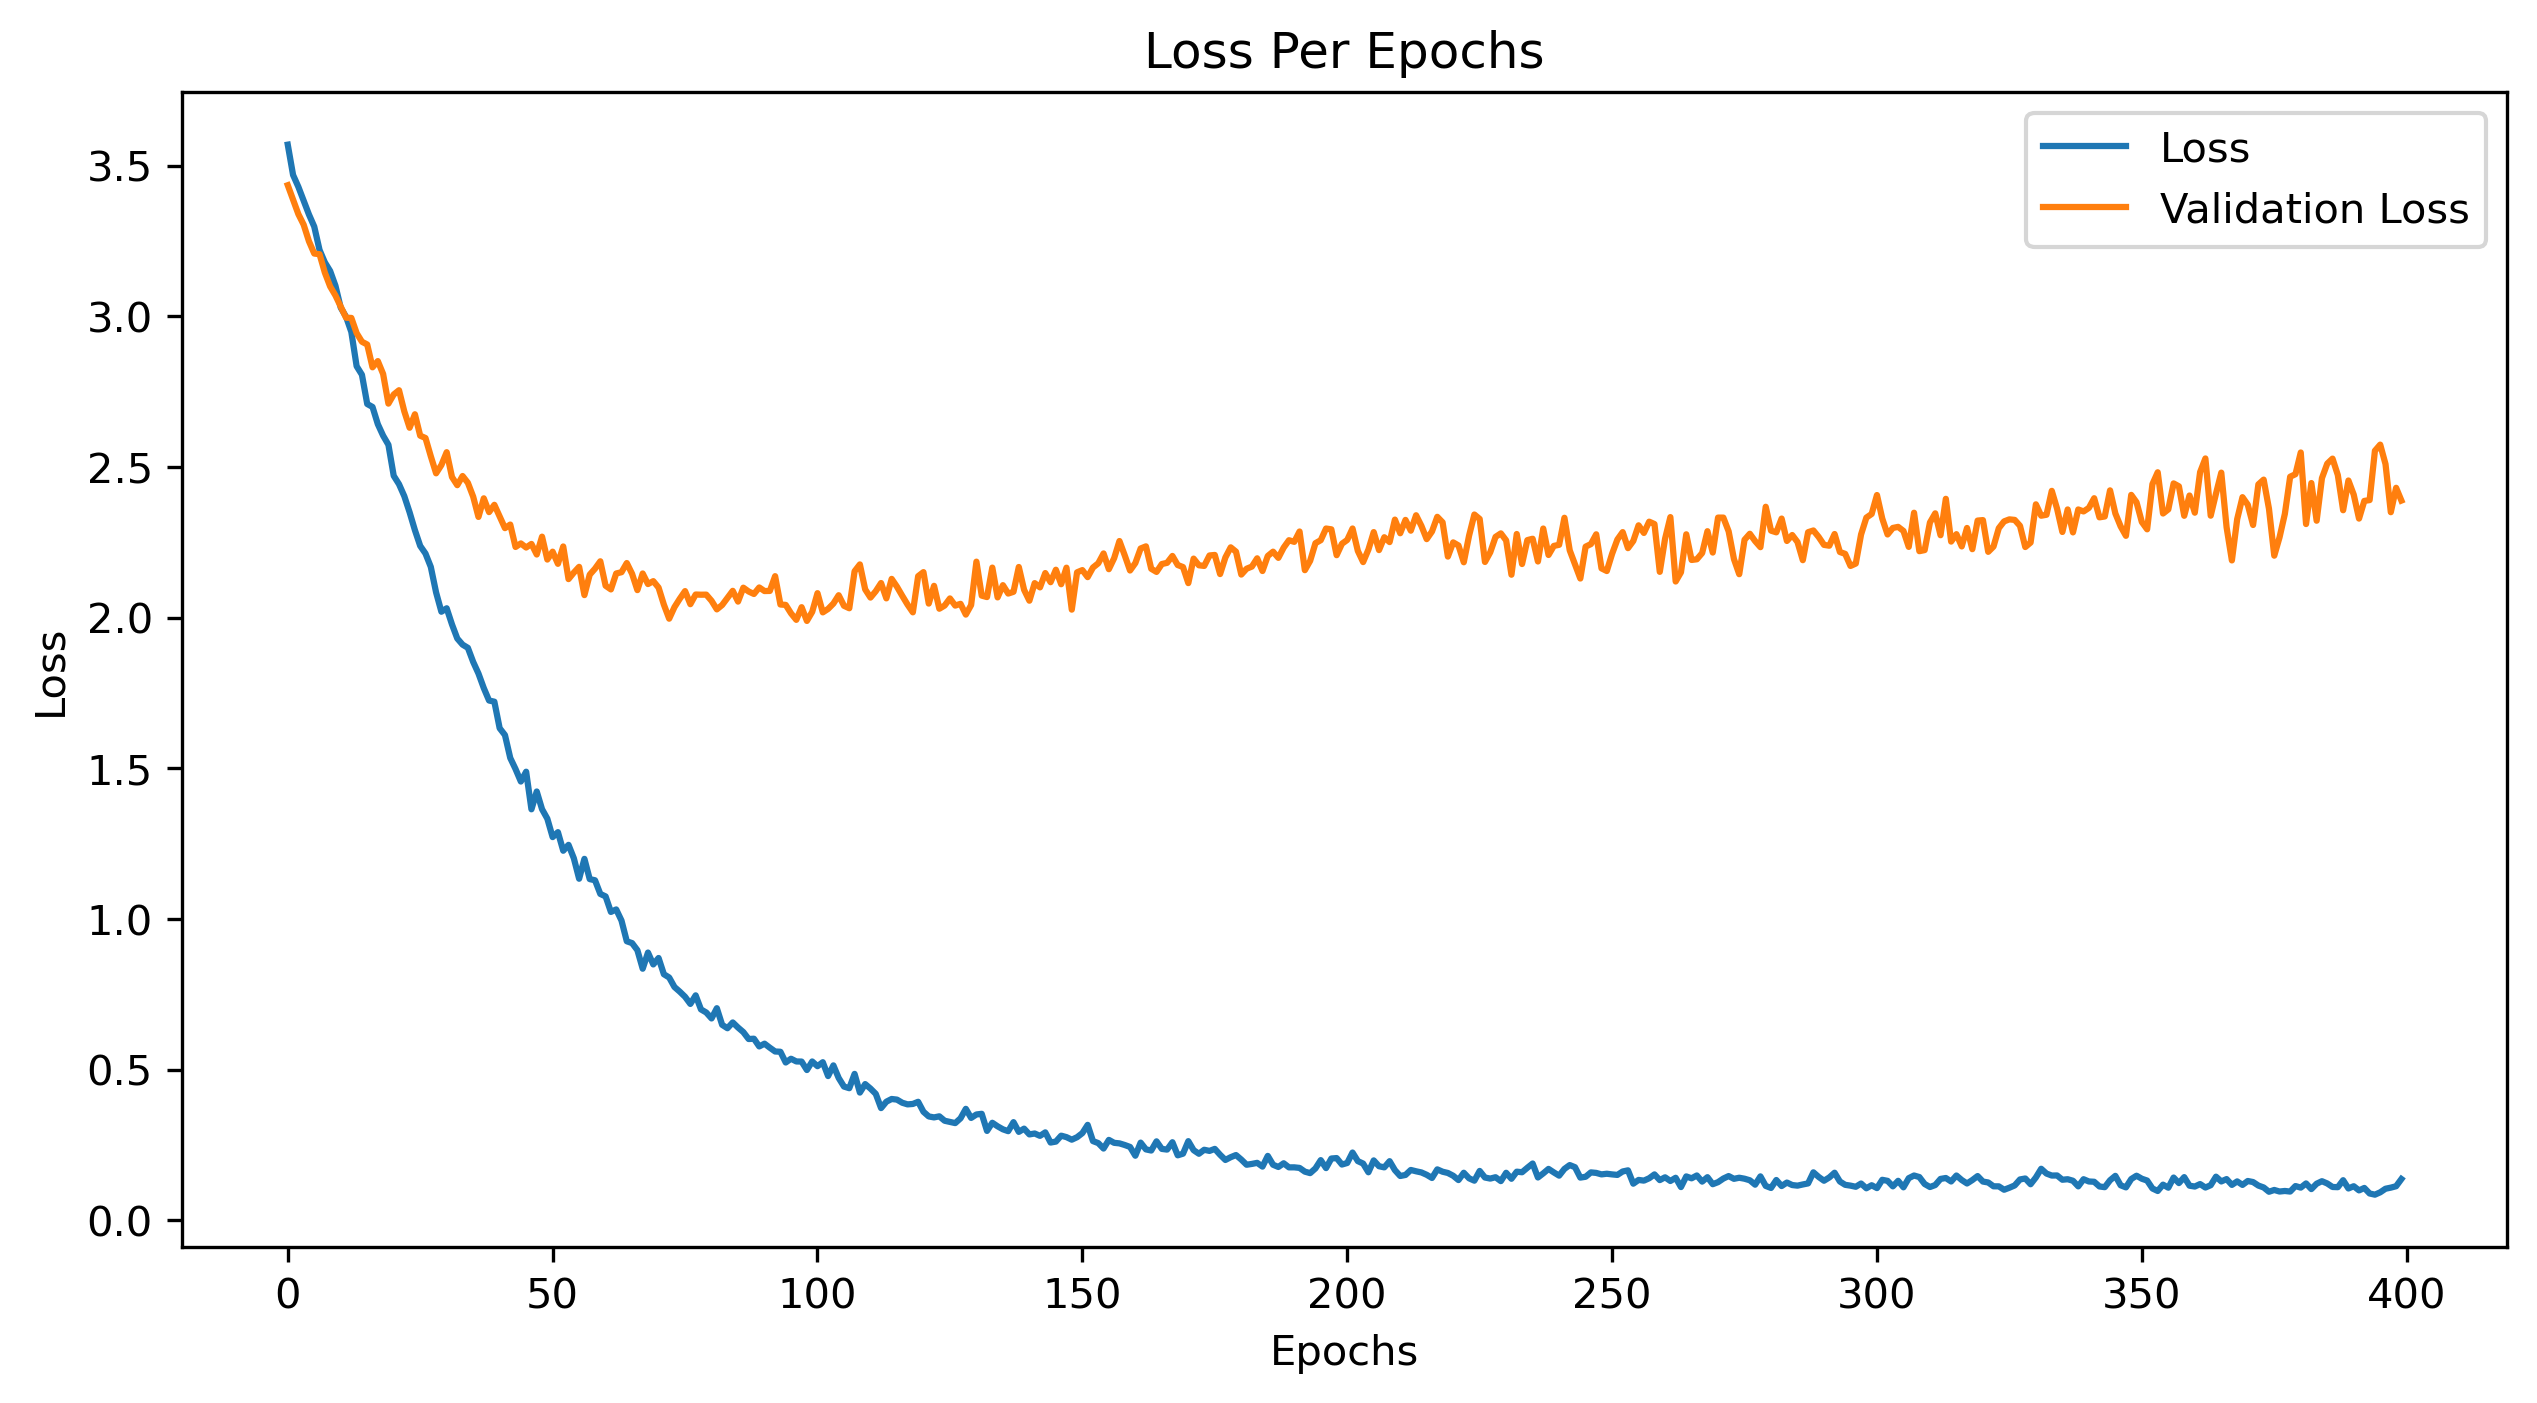

In [127]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
